In [182]:
import pandas as pd 
import matplotlib.pyplot as plt 

plt.style.use('ggplot')

In [183]:
# load in data 
df = pd.read_csv('cleaned_kaggle.csv')
df.head()

,rank,tier,url,job,location,title,company,country
0,1,grandmaster,/philippsinger,Senior Data Scientist at H2O.AI,"Vienna, Vienna, Austria",Senior Data Scientist,H2O.AI,Austria
1,2,grandmaster,/wowfattie,Data Scientist at H2O.ai,"New York, New York, United States",Data Scientist,H2O.ai,United States
2,3,grandmaster,/christofhenkel,Deep Learning Data Scientist at Nvidia,"Munich, Bavaria, Germany",Deep Learning Data Scientist,Nvidia,Germany
3,5,grandmaster,/dott1718,Senior Data Scientist at H2O.ai,"Vienna, Vienna, Austria",Senior Data Scientist,H2O.ai,Austria
4,6,grandmaster,/kazanova,Data Scientist at H2O ai,"Volos, Greece",Data Scientist,H2O.AI,Greece


In [184]:
# clean job titles 
df['title'] = df['title'].str.lower()

In [185]:
# combine job titles 
df['title'].replace('senior data scientist', 'data scientist', inplace = True)
df['title'].replace('ds', 'data scientist', inplace = True)
df['title'].replace('lead data scientist', 'data scientist', inplace = True)
df['title'].replace('phd student', 'student', inplace = True)
df['title'].replace('ml engineer', 'machine learning engineer', inplace = True)
df['title'].replace('master', 'student', inplace = True)
df['title'].replace('graduate student', 'student', inplace = True)
df['title'].replace('research engineer', 'researcher', inplace = True)
df['title'].replace('master student', 'student', inplace = True)
df['title'].replace('undergraduate student', 'student', inplace = True)

In [186]:
# grab top 1000 ranked kagglers 
df_1000 = df[df['rank'] <= 1000].copy()

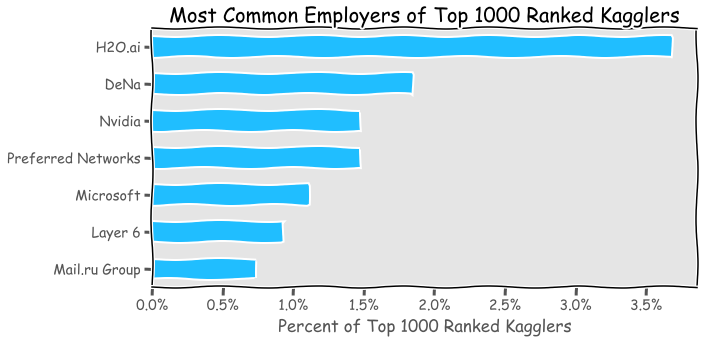

In [191]:
# most common employers 
with plt.xkcd():

    ax = df_1000['company'].str.lower().value_counts(normalize = True).head(7).plot(kind = 'barh', 
                                                                              color = '#20beff', 
                                                                      figsize = (10, 5))
    labels = ['H2O.ai', 'DeNa', 'Nvidia', 'Preferred Networks', 'Microsoft', 'Layer 6', 'Mail.ru Group']
    plt.yticks(range(7), labels)
    plt.gca().invert_yaxis()
    vals = ax.get_xticks()
    ax.set_xticklabels(['{:,.1%}'.format(x) for x in vals])
    plt.xlabel('Percent of Top 1000 Ranked Kagglers')
    plt.title('Most Common Employers of Top 1000 Ranked Kagglers')
    plt.tight_layout()
    plt.savefig('Most_Common_Employers')

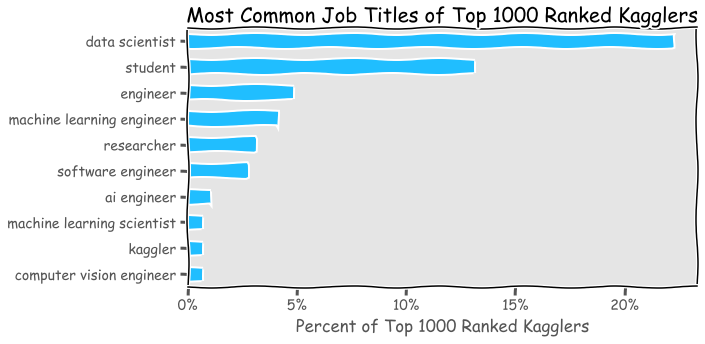

In [193]:
# most common job titles 
with plt.xkcd():
    ax = df_1000['title'].value_counts(normalize = True).head(10).plot(kind = 'barh', 
                                                                        color = '#20beff', 
                                                                      figsize = (10, 5))
    plt.gca().invert_yaxis()
    vals = ax.get_xticks()
    ax.set_xticklabels(['{:,.0%}'.format(x) for x in vals])
    plt.xlabel('Percent of Top 1000 Ranked Kagglers')
    plt.title('Most Common Job Titles of Top 1000 Ranked Kagglers')
    plt.tight_layout()
    plt.savefig('Most_Common_Job_Title')

In [189]:
top_employers = df_1000['company'].str.lower().value_counts(normalize = True).head(7)
df_1000['company'] = df_1000['company'].str.lower()

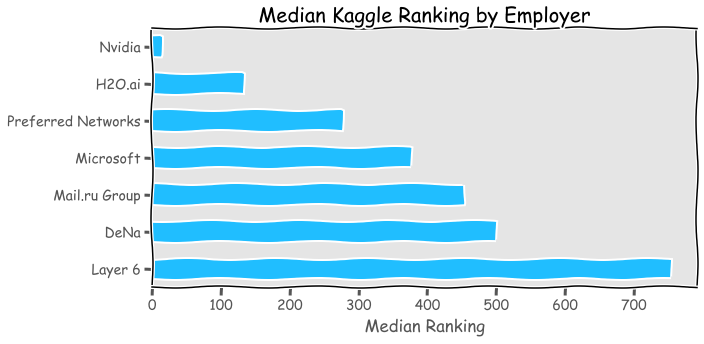

In [192]:
with plt.xkcd():
    med = df_1000[df_1000['company'].str.lower().isin(top_employers.index)].groupby('company')['rank'].median()
    med.sort_values(ascending = False).plot(kind = 'barh', color = '#20beff', 
                                                                      figsize = (10, 5))
    plt.ylabel('')
    plt.xlabel('Median Ranking')
    labels = ['Layer 6','DeNa','Mail.ru Group','Microsoft','Preferred Networks','H2O.ai','Nvidia']
    plt.yticks(range(7), labels)
    plt.title('Median Kaggle Ranking by Employer')
    plt.tight_layout()
    plt.savefig('Median_Kaggle_Ranking')